In [114]:
# Basic Libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
import warnings
warnings.filterwarnings('ignore')

In [115]:
#stuData = pd.read_csv('student-por.csv')
stuData = pd.read_csv(r"C:\Users\priya\Downloads\archive\student-por.csv")
stuData.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [116]:
stuData.isna().sum() #No Missing data

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Classification Tree (Machine Learning)

In [117]:
stuData = pd.read_csv(r"C:\Users\priya\Downloads\archive\student-por.csv")
stuData['failures'].describe()

count    649.000000
mean       0.221880
std        0.593235
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Ratio of classes is Y : N =  580 : 69


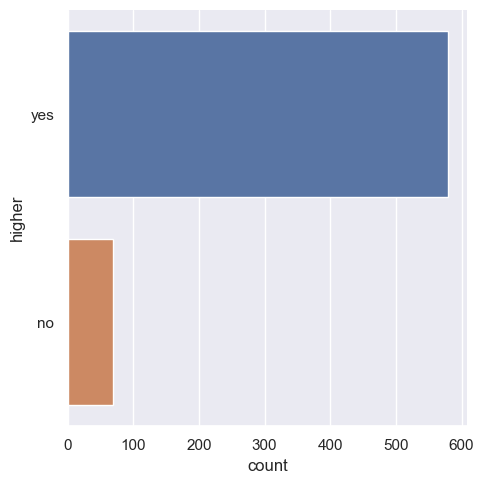

In [118]:
sb.catplot(y = 'higher', data = stuData, kind = "count")
countY, countX = stuData.higher.value_counts()
print("Ratio of classes is Y : N = ", countY, ":", countX)

<AxesSubplot:xlabel='G3', ylabel='higher'>

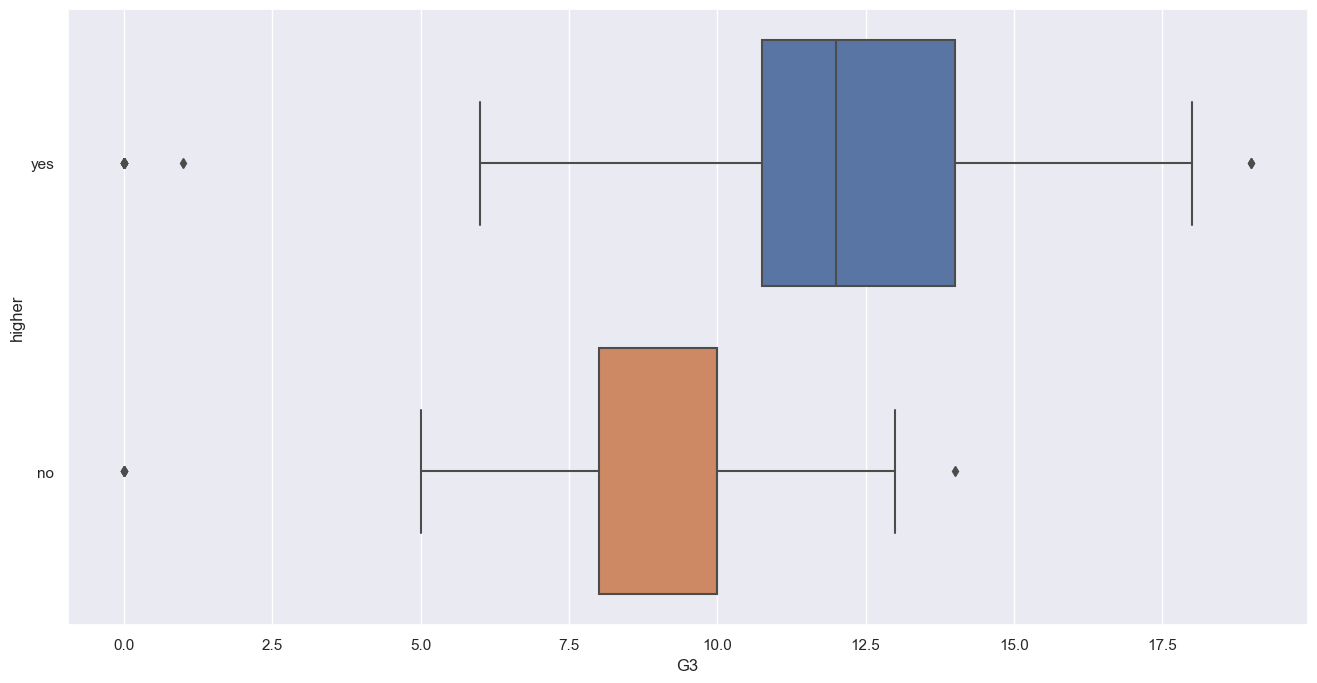

In [119]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'G3', y = 'higher', data = stuData)

The two boxplots for G3, for higher = Y and higher = N, are different from one another in terms of their median value, as well as spread. This means that higher has an effect on G3, and hence, G3 will probably be an important variable in predicting higher.

Predicting higher using All Variables

In [148]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(stuData['higher'])
X = pd.DataFrame(stuData[['G3', 'absences', 'studytime']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'G3 <= 9.5\ngini = 0.186\nsamples = 519\nvalue = [54, 465]\nclass = Y'),
 Text(0.25, 0.7, 'studytime <= 1.5\ngini = 0.459\nsamples = 87\nvalue = [31, 56]\nclass = Y'),
 Text(0.125, 0.5, 'absences <= 7.0\ngini = 0.5\nsamples = 43\nvalue = [22, 21]\nclass = N'),
 Text(0.0625, 0.3, 'absences <= 1.0\ngini = 0.485\nsamples = 29\nvalue = [12, 17]\nclass = Y'),
 Text(0.03125, 0.1, 'gini = 0.498\nsamples = 15\nvalue = [8, 7]\nclass = N'),
 Text(0.09375, 0.1, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]\nclass = Y'),
 Text(0.1875, 0.3, 'absences <= 11.0\ngini = 0.408\nsamples = 14\nvalue = [10, 4]\nclass = N'),
 Text(0.15625, 0.1, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = N'),
 Text(0.21875, 0.1, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]\nclass = N'),
 Text(0.375, 0.5, 'absences <= 4.5\ngini = 0.325\nsamples = 44\nvalue = [9, 35]\nclass = Y'),
 Text(0.3125, 0.3, 'studytime <= 3.5\ngini = 0.252\nsamples = 27\nvalue = [4, 23]\nclass = Y'),
 Text(0.28125, 0.1, 'gini = 0.

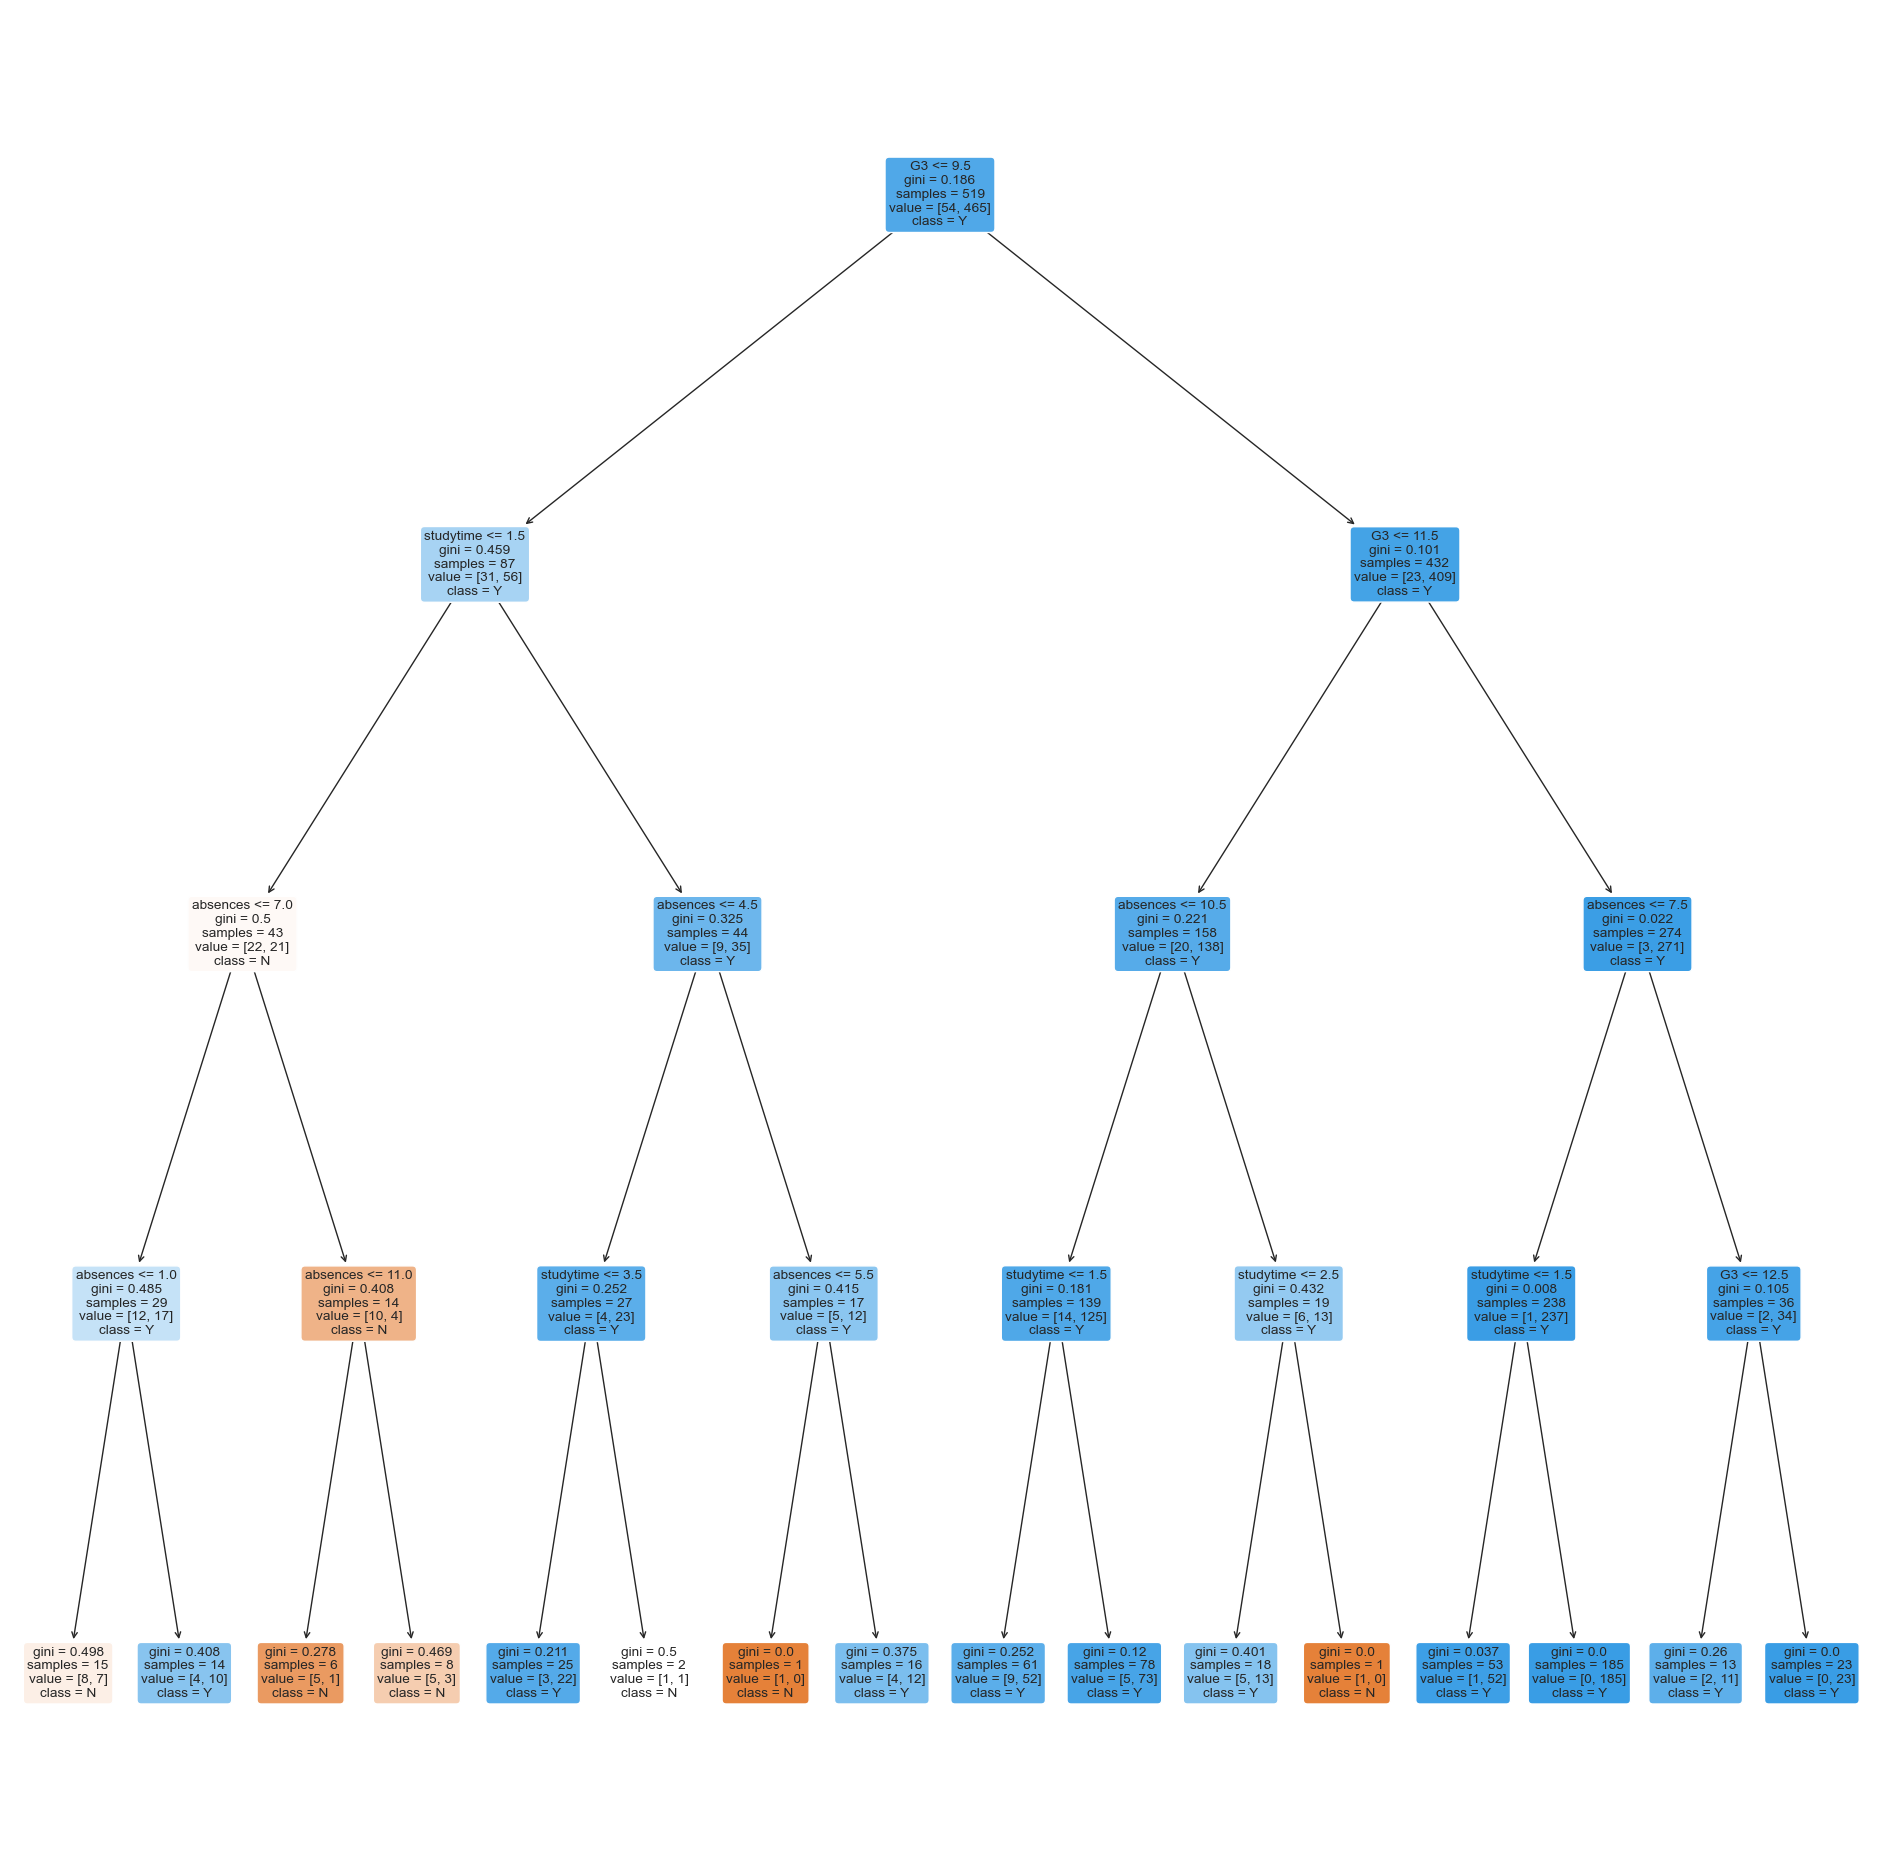

In [149]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9132947976878613

TPR Train :	 0.9741935483870968
TNR Train :	 0.3888888888888889

FPR Train :	 0.6111111111111112
FNR Train :	 0.025806451612903226


<AxesSubplot:>

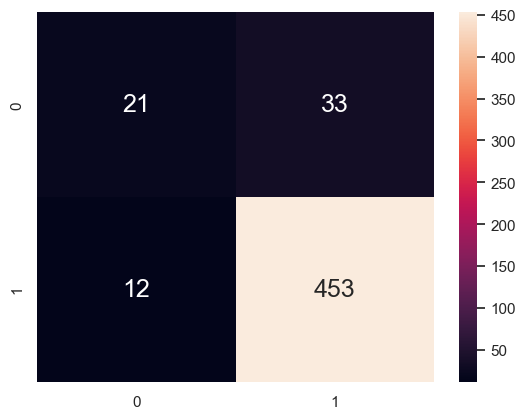

In [150]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8769230769230769

TPR Test :	 0.9826086956521739
TNR Test :	 0.06666666666666667

FPR Test :	 0.9333333333333333
FNR Test :	 0.017391304347826087


<AxesSubplot:>

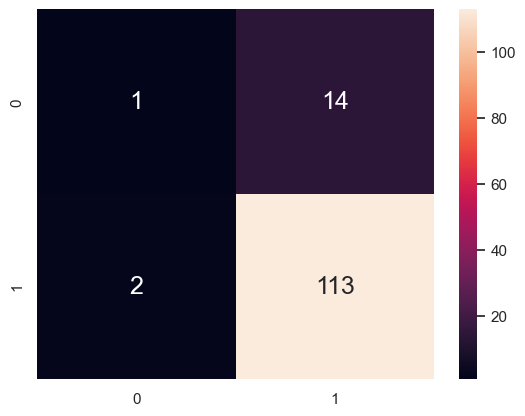

In [151]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5, 0.9285714285714286, 'G1 <= 9.5\ngini = 0.168\nsamples = 519\nvalue = [48, 471]\nclass = Y'),
 Text(0.22826086956521738, 0.7857142857142857, 'absences <= 1.0\ngini = 0.407\nsamples = 123\nvalue = [35, 88]\nclass = Y'),
 Text(0.11956521739130435, 0.6428571428571429, 'G3 <= 3.5\ngini = 0.486\nsamples = 36\nvalue = [15, 21]\nclass = Y'),
 Text(0.06521739130434782, 0.5, 'G1 <= 6.0\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Y'),
 Text(0.043478260869565216, 0.35714285714285715, 'G1 <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = N'),
 Text(0.021739130434782608, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = N'),
 Text(0.06521739130434782, 0.21428571428571427, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = N'),
 Text(0.08695652173913043, 0.35714285714285715, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = Y'),
 Text(0.17391304347826086, 0.5, 'studytime <= 2.5\ngini = 0.499\nsamples = 25\nvalue = [13, 12]\nclass = N'),
 Text(0.1521739

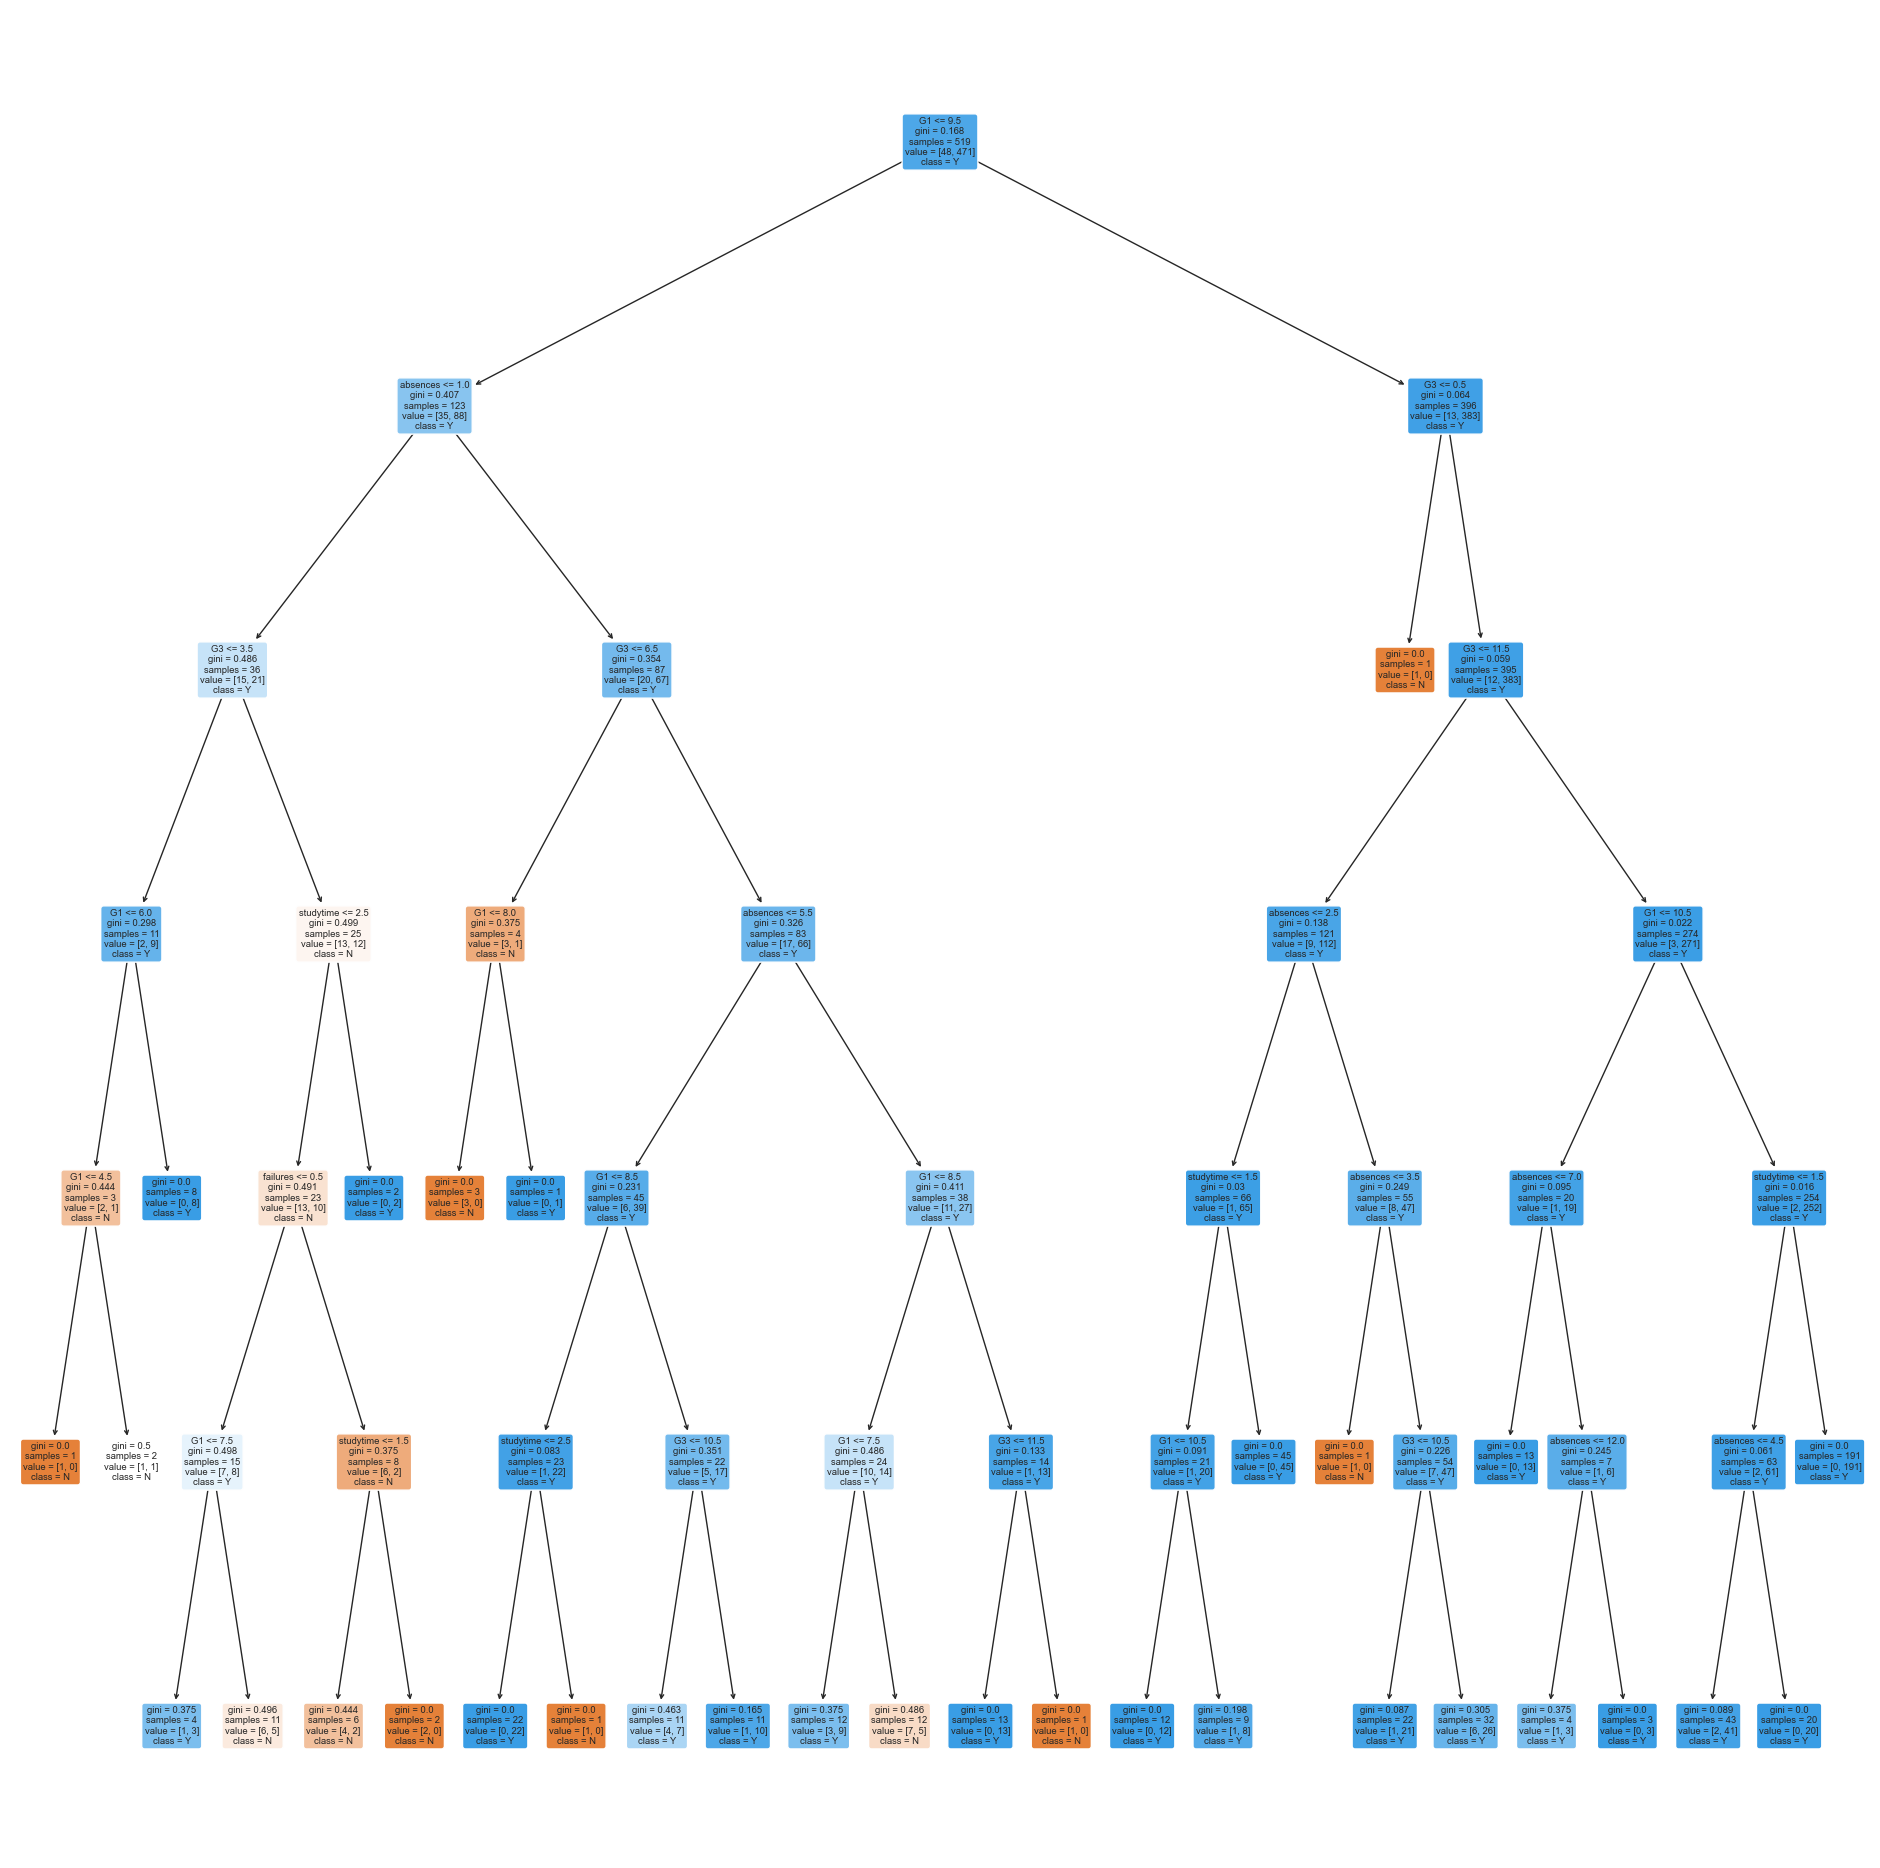

In [152]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(stuData['higher'])
X = pd.DataFrame(stuData[['G3', 'absences', 'studytime','G1','failures']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # CHANGE IT HERE AND EXPERIMENT
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Data
Accuracy  :	 0.9364161849710982

TPR Train :	 0.9723991507430998
TNR Train :	 0.5833333333333334

FPR Train :	 0.4166666666666667
FNR Train :	 0.027600849256900213


<AxesSubplot:>

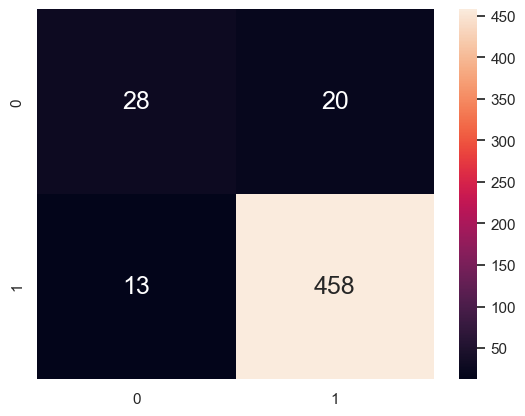

In [153]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.823076923076923

TPR Test :	 0.9541284403669725
TNR Test :	 0.14285714285714285

FPR Test :	 0.8571428571428571
FNR Test :	 0.045871559633027525


<AxesSubplot:>

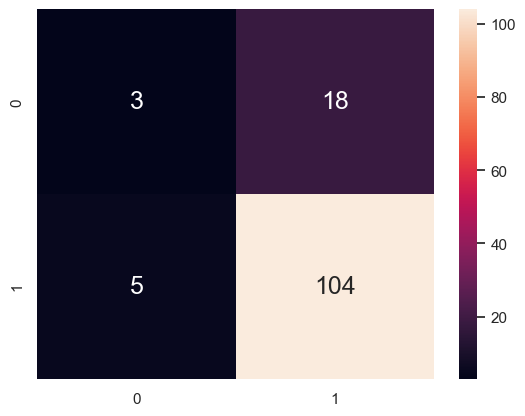

In [154]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Y (1) predicted Y (1)
fpTest = cmTest[0][1] # False Positives : N (0) predicted Y (1)
tnTest = cmTest[0][0] # True Negatives : N (0) predicted N (0)
fnTest = cmTest[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [155]:
# Combine the training dataset
train_set = X_train.join(y_train).reindex(X_train.index)

# Check the train_set quickly
print("Train set :", train_set.shape)
print("wants to attain higher education in Train Set")
print(train_set["higher"].value_counts())

Train set : (519, 6)
wants to attain higher education in Train Set
1    471
0     48
Name: higher, dtype: int64


In [156]:
# Filter to the target leaf node
filter_rule = (7.5 < train_set["G3"]) & (train_set["G3"] <= 9.5)
filter_set = train_set[filter_rule]

# Check the data points after filter
print("Filtered set :", filter_set.shape)
print("wants to purse higher education in the Leaf Node")
print(filter_set["higher"].value_counts())

Filtered set : (56, 6)
wants to purse higher education in the Leaf Node
1    42
0    14
Name: higher, dtype: int64


In [157]:
# Extract the False Positives
fp_set = filter_set[filter_set['higher'] == 'Y']
print(fp_set)

Empty DataFrame
Columns: [G3, absences, studytime, G1, failures, higher]
Index: []


In [158]:
# Import essential models and functions from sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


stuData = pd.read_csv(r"C:\Users\priya\Downloads\archive\student-por.csv")

stuData['higher'] = stuData['higher'].replace({'yes': 1, 'no': 0})
# Extract Response and Predictors
y = pd.DataFrame(stuData['G1'])
X = pd.DataFrame(stuData[['higher','absences','G3','failures']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Create SVR model and fit with training data
svr_model = SVR(kernel='linear', C=1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict the test set results
y_pred = svr_model.predict(X_test)

# Evaluate the model performance
print('R-squared value:', r2_score(y_test, y_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared value: 0.658537736464097
Root mean squared error: 1.674554435921896


In [159]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


# Extract response and predictors
y = stuData['G1']
X = stuData[['higher','G3','studytime', 'failures']]

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVR model
model = SVR()
model.fit(X_train, y_train)


SVR()

Number of overestimated grades: 58
Number of underestimated grades: 72


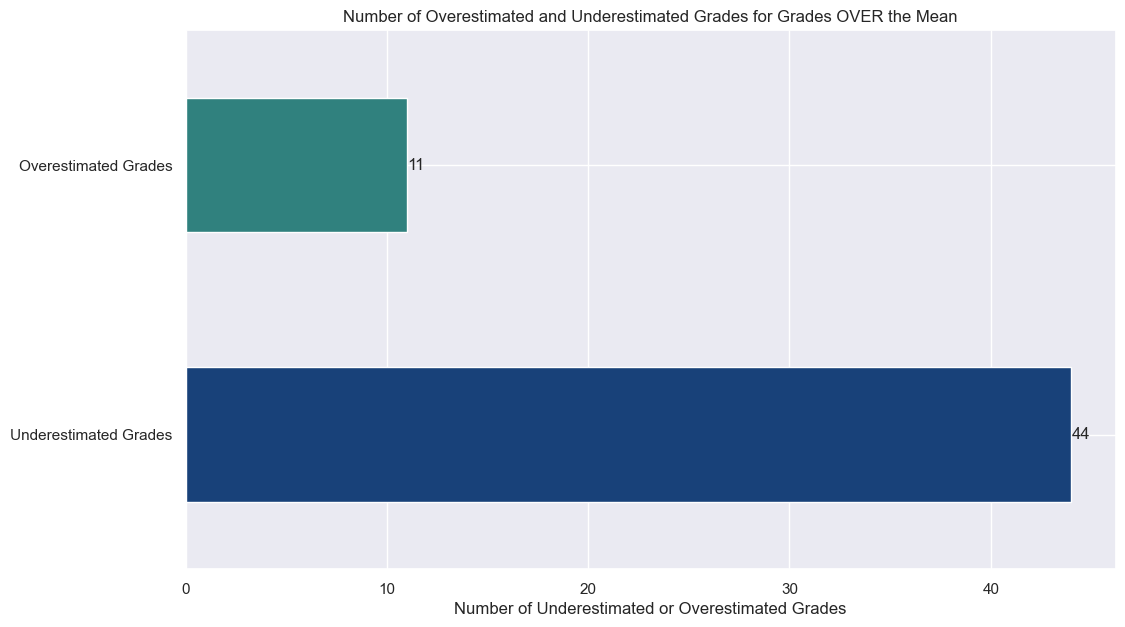

In [160]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Compute the differences between predicted and actual grades
delta = y_test - y_pred

# Count the number of overestimated and underestimated grades
overestimated = delta[delta < 0].count()
underestimated = delta[delta > 0].count()

# Print the results
print(f'Number of overestimated grades: {overestimated}')
print(f'Number of underestimated grades: {underestimated}')

# Compute the differences between predicted and actual grades for grades over the mean
delta_over = y_test[y_test > y_test.mean()] - y_pred[y_test > y_test.mean()]

# Count the number of overestimated and underestimated grades
overestimated_over_mean = (delta_over < 0).sum()
underestimated_over_mean = (delta_over > 0).sum()

# Plot the results
plt.figure(figsize=(12,7))
ax = pd.Series({'Overestimated Grades': overestimated_over_mean,
                'Underestimated Grades': underestimated_over_mean}).sort_values(ascending=False).plot(kind='barh',
                                                                                             title='Number of Overestimated and Underestimated Grades for Grades OVER the Mean',
                                                                                             color=sns.color_palette('gist_earth'))
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Number of Underestimated or Overestimated Grades')
plt.show()


The number of overestimated and underestimated grades in train and test set is almost close to eachother. However the mean is 3:1 ratio, it means that the model is not predicting well, and there is significant bias in the model. This indicates that there is a significant difference between the number of overestimated and underestimated grades, the model is biased towards overestimating or underestimating student grades.

In [161]:
def remove_outliers_quartiles(data, column, iqr_factor=1.5):

    # Calculate the interquartile range (IQR) for the column
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outlier removal
    lower_bound = q1 - iqr_factor * iqr
    upper_bound = q3 + iqr_factor * iqr
    
    # Filter out rows with values outside the bounds
    filtered_data = stuData[(stuData[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Return the filtered data
    return filtered_data

stuData = remove_outliers_quartiles(stuData, "higher")
stuData = remove_outliers_quartiles(stuData, "G3")
stuData = remove_outliers_quartiles(stuData, "G1")
stuData = remove_outliers_quartiles(stuData, "studytime")
stuData = remove_outliers_quartiles(stuData, "failures")

In [162]:
# Import essential models and functions from sklearn
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variable to numerical
stuData['higher'] = stuData['higher'].replace({'no': 0, 'yes': 1})

# Extract Response and Predictors
y = pd.DataFrame(stuData['G1'])
X = pd.DataFrame(stuData[['higher','studytime','G3','failures']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the SVR
svr = SVR(kernel='rbf')

# Fit the SVR on the training data
svr.fit(X_train, y_train)

# Make predictions using the trained SVR
y_pred = svr.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)

# Calculate and print the R2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)


Mean Squared Error (MSE):  1.5384620073594533
R2 score:  0.7518121761686853


The R^2 scores for the train and test sets are higher in this model compared to the uncleaned data and the MSE value is lower in this model than model that hasnot been cleaned as such it is a better model.
